In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [2]:
df=pd.read_csv("C:/Users/saran/Downloads/DS1_C8_V3_ND_Sprint3_BankChurn_Data.csv")   # Reading the Csv file
df.head()        

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Region,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,England,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,Northern Ireland,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,England,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,Wales,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,England,21,5,1,0,4716.0,0,4716.0,816,28,0.000


In [3]:
df.shape    #checkinf for rows and columns

(10127, 20)

In [35]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.382245,2.345216,35.946677,3.812580,2.341167,2.455317,7914.311033,1162.814061,6652.674524,3910.163740,64.824134,0.274894
std,3.690378e+07,8.341393,1.295746,6.934324,1.554408,1.010622,1.106225,7211.021276,814.987335,7074.925563,2081.283454,23.382262,0.275691
min,7.080821e+08,18.000000,0.000000,18.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,32.000000,3.000000,2.000000,2.000000,2563.000000,359.000000,1324.500000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4597.000000,1276.000000,3474.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11081.500000,1784.000000,9859.000000,4741.000000,81.000000,0.503000
max,8.283431e+08,89.000000,5.000000,53.000000,6.000000,6.000000,6.000000,23720.800000,2517.000000,21964.600000,8212.400000,123.000000,0.999000


In [5]:
def seperate_data_types(df):                        
    categorical=[]
    continuous=[]
    for column in df.columns:
        if df[column].nunique()<40:
            
            categorical.append(column)
        else:
            continuous.append(column)
    return categorical, continuous

categorical, continuous = seperate_data_types(df)

table=[categorical,continuous]
print(tabulate({"Categorical":categorical,
              "Continuous":continuous},headers=["cattegorical","continuous"]))

cattegorical              continuous
------------------------  ---------------------
Attrition_Flag            CLIENTNUM
Gender                    Customer_Age
Education_Level           Dependent_count
Marital_Status            Months_on_book
Income_Category           Credit_Limit
Card_Category             Total_Revolving_Bal
Region                    Avg_Open_To_Buy
Total_Relationship_Count  Total_Trans_Amt
Months_Inactive_12_mon    Total_Trans_Ct
Contacts_Count_12_mon     Avg_Utilization_Ratio


## Null value treatment


In [6]:
df.isnull().sum()

CLIENTNUM                     0
Attrition_Flag                0
Customer_Age                  0
Gender                        0
Dependent_count               0
Education_Level               0
Marital_Status                0
Income_Category               0
Card_Category               132
Region                        0
Months_on_book                0
Total_Relationship_Count      0
Months_Inactive_12_mon        0
Contacts_Count_12_mon         0
Credit_Limit                 60
Total_Revolving_Bal           0
Avg_Open_To_Buy               0
Total_Trans_Amt               0
Total_Trans_Ct                0
Avg_Utilization_Ratio         0
dtype: int64

In [7]:
df['Card_Category'].fillna(df['Card_Category'].mode()[0], inplace=True)

In [8]:
df['Credit_Limit'].fillna(df['Credit_Limit'].mean(), inplace=True)

In [9]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Region                      0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
Total_Trans_Ct              0
Avg_Utilization_Ratio       0
dtype: int64

In [10]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.382245,2.787400,35.928409,3.812580,2.341167,2.455317,8703.180550,1162.814061,7469.139637,4404.086304,64.858695,0.274894
std,3.690378e+07,8.341393,6.479135,7.986416,1.554408,1.010622,1.106225,9162.791334,814.987335,9090.685324,3397.129254,23.472570,0.275691
min,7.080821e+08,18.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2563.000000,359.000000,1324.500000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4597.000000,1276.000000,3474.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11081.500000,1784.000000,9859.000000,4741.000000,81.000000,0.503000
max,8.283431e+08,89.000000,143.000000,56.000000,6.000000,6.000000,6.000000,34664.000000,2517.000000,34516.000000,18484.000000,139.000000,0.999000


## Outliers

In [11]:
continuous

['CLIENTNUM',
 'Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Avg_Utilization_Ratio']

In [12]:
Q1 = df[continuous].quantile(0.25)                                # Calculating the IQR for each numeric column
Q3 = df[continuous].quantile(0.75)
IQR = Q3 - Q1
                                                                  # Identify outliers using the IQR method
lf=Q1-1.5 * IQR
uf=Q3+1.5 * IQR

outliers = (df[continuous] < lf) | (df[continuous] > uf)            # Find the outliers

outliers_counts = outliers.sum()                                    # Counting the number of outliers in each column
 
print(outliers_counts)

CLIENTNUM                   0
Customer_Age               57
Dependent_count            63
Months_on_book            386
Credit_Limit             1008
Total_Revolving_Bal         0
Avg_Open_To_Buy           963
Total_Trans_Amt           896
Total_Trans_Ct              2
Avg_Utilization_Ratio       0
dtype: int64


In [13]:
def num_visual(col):
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(f'Boxplot of {col}')
    ax.set_xlabel(col)
    plt.show()


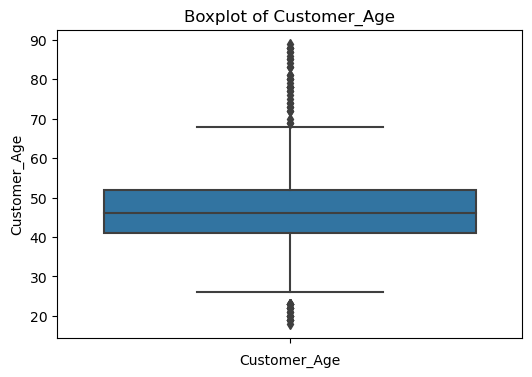

In [14]:
num_visual('Customer_Age')

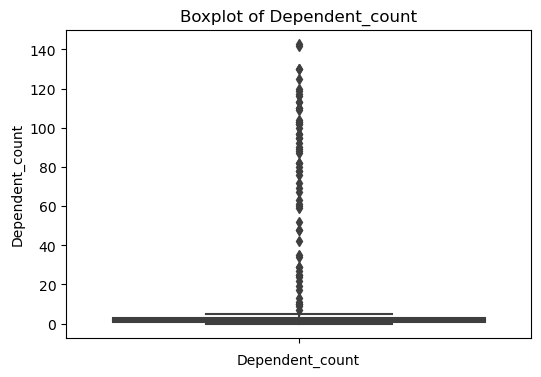

In [15]:
num_visual('Dependent_count')

In [16]:
df.loc[outliers['Dependent_count'], 'Dependent_count'] = df['Dependent_count'].median()

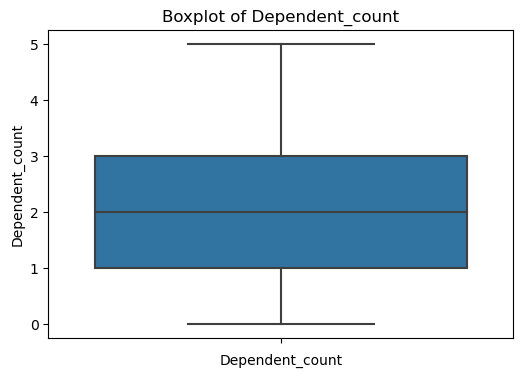

In [17]:
num_visual('Dependent_count')

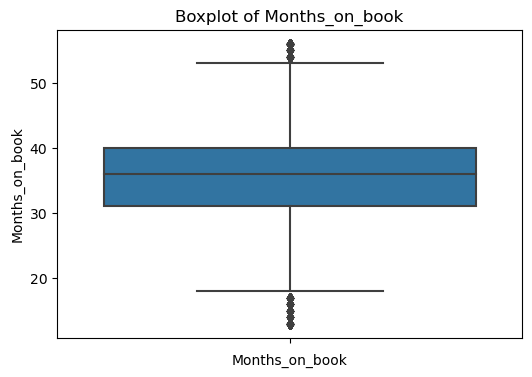

In [18]:
num_visual('Months_on_book')

In [19]:
df.loc[outliers['Months_on_book'], 'Months_on_book'] = df['Months_on_book'].median()

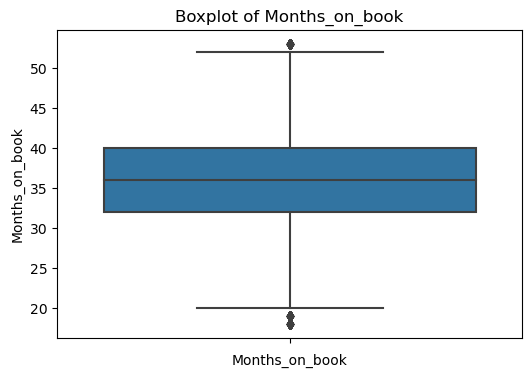

In [20]:
num_visual('Months_on_book')

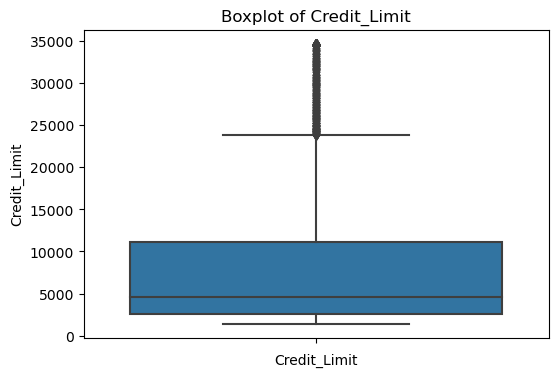

In [21]:
num_visual('Credit_Limit')

In [22]:
clq = df['Credit_Limit'].quantile(0.90)
df.loc[df['Credit_Limit'] > clq, 'Credit_Limit'] = clq

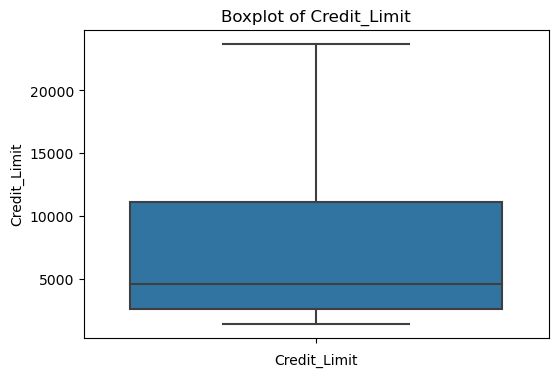

In [23]:
num_visual('Credit_Limit')

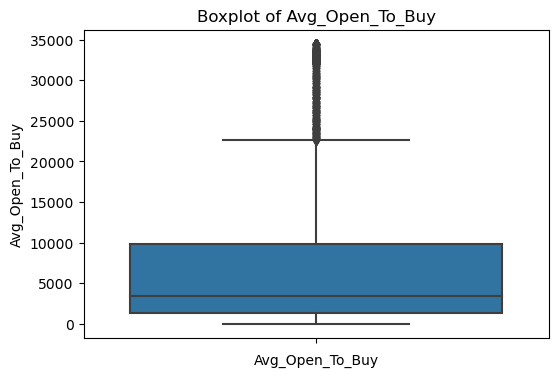

In [24]:
num_visual('Avg_Open_To_Buy')

In [25]:
obq = df['Avg_Open_To_Buy'].quantile(0.90)
df.loc[df['Avg_Open_To_Buy'] > obq, 'Avg_Open_To_Buy'] = obq

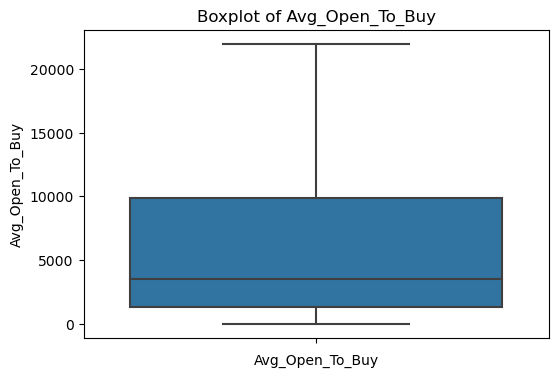

In [26]:
num_visual('Avg_Open_To_Buy')

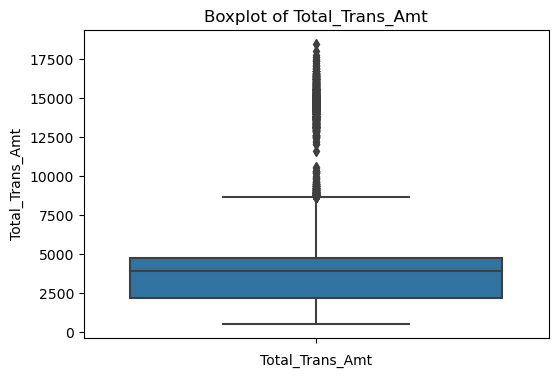

In [27]:
num_visual('Total_Trans_Amt')

In [28]:
taq = df['Total_Trans_Amt'].quantile(0.90)
df.loc[df['Total_Trans_Amt'] > taq, 'Total_Trans_Amt'] = taq

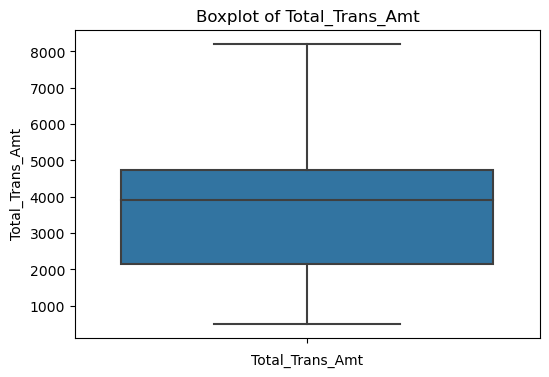

In [29]:
num_visual('Total_Trans_Amt')

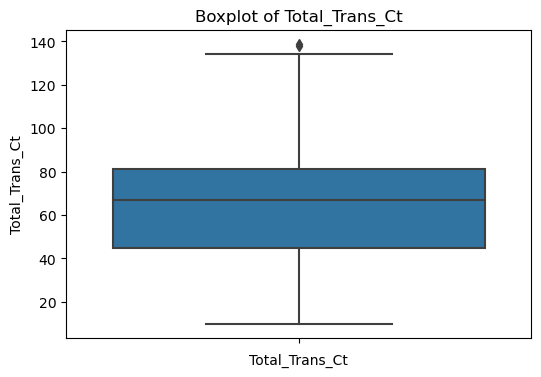

In [30]:
num_visual('Total_Trans_Ct')

In [31]:
tcq = df['Total_Trans_Ct'].quantile(0.99)
df.loc[df['Total_Trans_Ct'] > tcq, 'Total_Trans_Ct'] = tcq

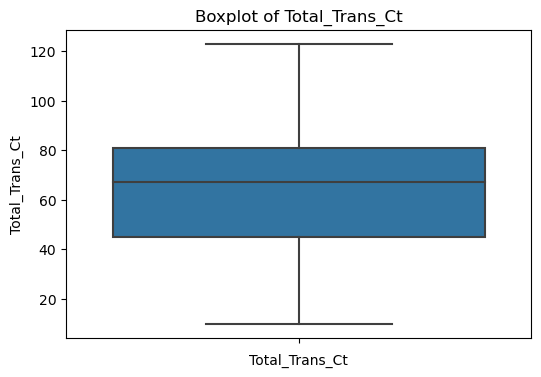

In [32]:
num_visual('Total_Trans_Ct')

In [33]:
df.to_csv("C:\\Users\\saran\\Downloads\\BankChurn_Data.csv")